En este caso se han realizado las siguientes modificaciones:
1. Arquitectura: En este caso se ha usado una squeezenet1_0 que deriva de Alexnet y tiene 50x menos parametros
https://pytorch.org/hub/pytorch_vision_squeezenet/


In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
from PIL import Image

In [6]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo3Oversampling/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=9, seed=43)

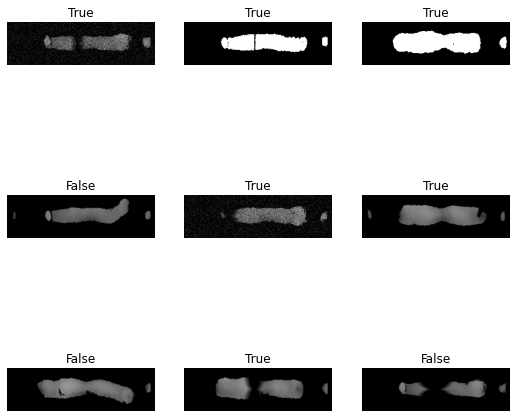

In [7]:
dls.show_batch()

In [9]:
precision = Precision()
f1 = F1Score()

In [14]:
learn = Learner(dls, squeezenet1_0(pretrained = True), opt_func = SGD,
              metrics=[accuracy,precision,f1])

In [15]:
learn.fit(4)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.234516,0.532940,0.759286,0.989218,0.685341,00:19
1,0.151767,0.385971,0.808571,0.988688,0.765324,00:19
2,0.105862,0.235683,0.865000,0.982987,0.846216,00:19
3,0.101148,0.117174,0.964286,0.962963,0.964337,00:19


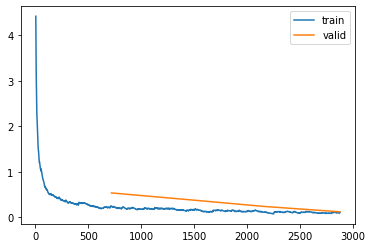

In [16]:
learn.recorder.plot_loss()

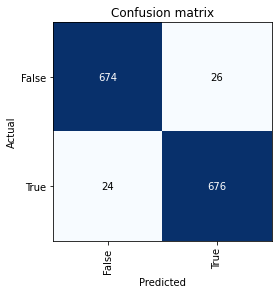

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

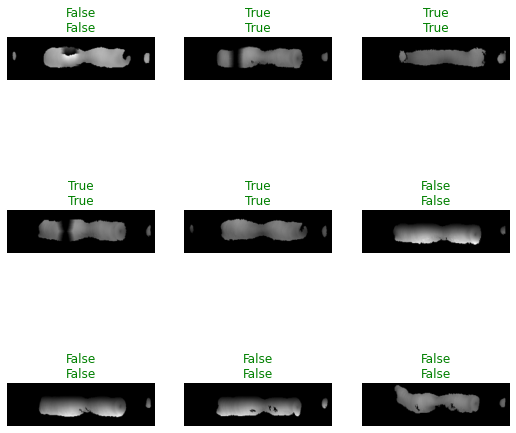

In [18]:
learn.show_results()

In [19]:
learn.summary()

SqueezeNet (Input shape: 9)
Layer (type)         Output Shape         Param #    Trainable 
                     9 x 96 x 32 x 117   
Conv2d                                    14208      True      
ReLU                                                           
MaxPool2d                                                      
____________________________________________________________________________
                     9 x 16 x 16 x 58    
Conv2d                                    1552       True      
ReLU                                                           
____________________________________________________________________________
                     9 x 64 x 16 x 58    
Conv2d                                    1088       True      
ReLU                                                           
____________________________________________________________________________
                     9 x 64 x 16 x 58    
Conv2d                                    9280       True    